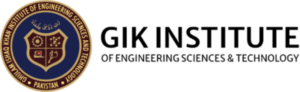

# Classification of the CIFAR-10 dataset

The [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) provides 60000 32x32-pixel images, classified into 10 categories.  The figure below provides a random sample of some images in each category.

![cifar.png](cifar.png)

During this assignment, you will learn how to build a Convolutional Neural Network (CNN), which (when trained) will be able to automatically classify new images into one of these categories.  We will make use of the [Keras library](https://www.tensorflow.org/guide/keras) which provides a high-level interface to TensorFlow.

# Table of content

[1. Introduction to keras](#intro_keras)<br>
[2. A first look at the data set](#dataset)<br>
[3. A first naive model](#first_model)<br>
[4. Interpreting the results](#results)<br>
[4.1 Making predictions](#results_prediction)<br>
[4.2 Evaluating the results](#results_evaluation)<br>



<a id='intro_keras'></a>

## 0 - Introduction to Keras

Keras is a high-level API to build and train deep learning models. It's used for fast prototyping, advanced research, and production, with three key advantages:

- __User friendly__: Keras has a simple, consistent interface optimized for common use cases. It provides clear and actionable feedback for user errors.
- __Modular and composable__: Keras models are made by connecting configurable building blocks together, with few restrictions.
- __Easy to extend__: Write custom building blocks to express new ideas for research. Create new layers, loss functions, and develop state-of-the-art models.

In Keras, models are built by assymbling multiple layers.  Suppose we want to create a new multilayer perceptron model to categorize 128-feature data into 10 labeled categories.  Keras code looks like:

```python
# Create a sequential model
model = keras.models.Sequential()
# Adds a densely-connected layer with 64 units to the model
model.add(layers.Dense(64, activation='relu'), input_shape=[128])
# Add another
model.add(layers.Dense(32, activation='relu'))
# Add a softmax layer with 10 output units
model.add(layers.Dense(10, activation='softmax'))
```

The `input_shape` argument must be given for the first layer in the model, however all other layers will automatically determine the input shape based on the previous layer in the model.  Note that the code above is substantially simpler than the corresponding TensorFlow code.  This is particularly useful for building convolutional or other types of layers, as we will see.

Once built, a model's learning can be configured with the `compile()` function:

```python
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.train.AdamOptimizer(0.001), 
    metrics=['accuracy'])
```

In this case, a cross-entropy loss function is used with the ADAM optimization algorithm.  The `metrics` argument allows the model to keep track of a number of [training metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) during training.

Once configured, training is performed using the `fit()` function.

```python
model.fit(data, labels, epochs=10, batch_size=32)
```

The function takes an array-like (could be numpy array) of data and the corresponding target values, and performs the optimization of the learnable parameters in the model.  See the documentation for the [fit()](https://www.tensorflow.org/api_docs/python/tf/keras/models/Model#fit) function for more details.

Once trained, the model can be used to predict, using the `predict()` function. 

```python
prediction = model.predict(new_data)
```

<a id='dataset'></a>
# 1 - Understanding the data set

Begin by importing the necessary modules.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model
from keras.models import Sequential
from keras.callbacks import EarlyStopping

Understanding your dataset is the first prerequisit to training any model.  The CIFAR-10 dataset can be loaded directly from Keras.

**Q1) Download the dataset. See [`keras.datasets`](https://keras.io/datasets/) for how to download the data, and in what format it is provided.  Note that the dataset is already divided into a training set of 50000 images, and a test set of 10000.**

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

**Q2) Verify that the shape of the image and target arrays are what you expect.**

The code I provided above already does this by using the assert statements. If there are no assertion errors, it means that the shapes of the arrays are as expected.

We now create a list of labels corresponding to the 10 categories.  It will be used to convert the 0-9 digits in the target arrays to string labels. The categories are labeled as follows:

  0. airplane
  1. automobile
  2. bird
  3. cat
  4. deer
  5. dog
  6. frog
  7. horse
  8. ship
  9. truck


In [3]:
class_labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

**Q3) Normalize the image data from [0,255] to be [0,1].  Normalizing improves model training (to test this, you can comment out the normalization later).**

In [4]:
# Normalize the image data
x_train = x_train / 255.0
x_test = x_test / 255.0

**Q4) Convert the target arrays to one-hot encodings.  Hint: checkout the [`keras.utils.np_utils.to_categorical()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)**

In [5]:
from tensorflow.keras.utils import to_categorical

# Convert the target arrays to one-hot encodings
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

**Q5) Visualize some images in each category using the `imshow()` function in `matplotlib.pyplot`.  Can you recreate the figure below?  Hint: the below figure was created using the first 8 images belonging to each category in the training data.**

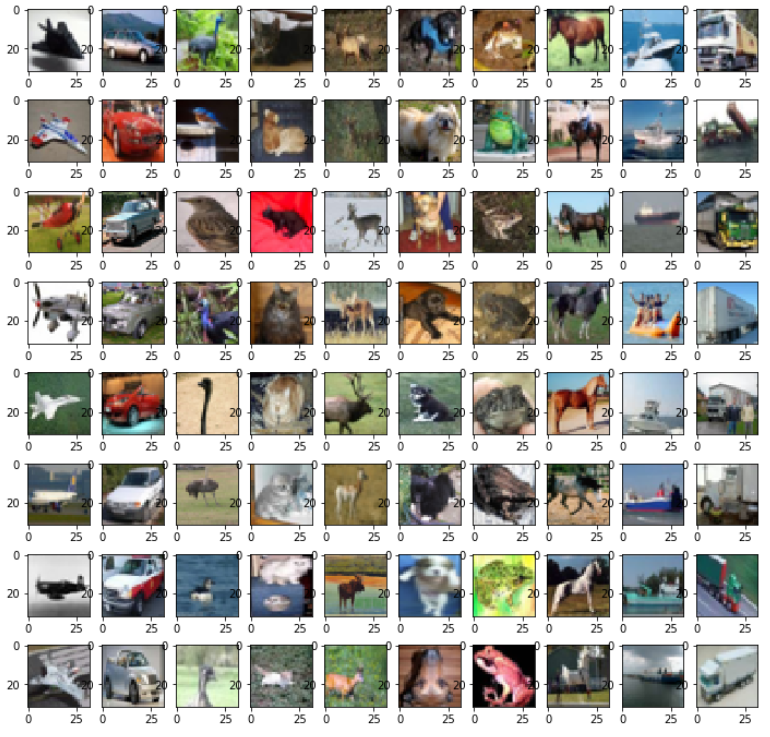

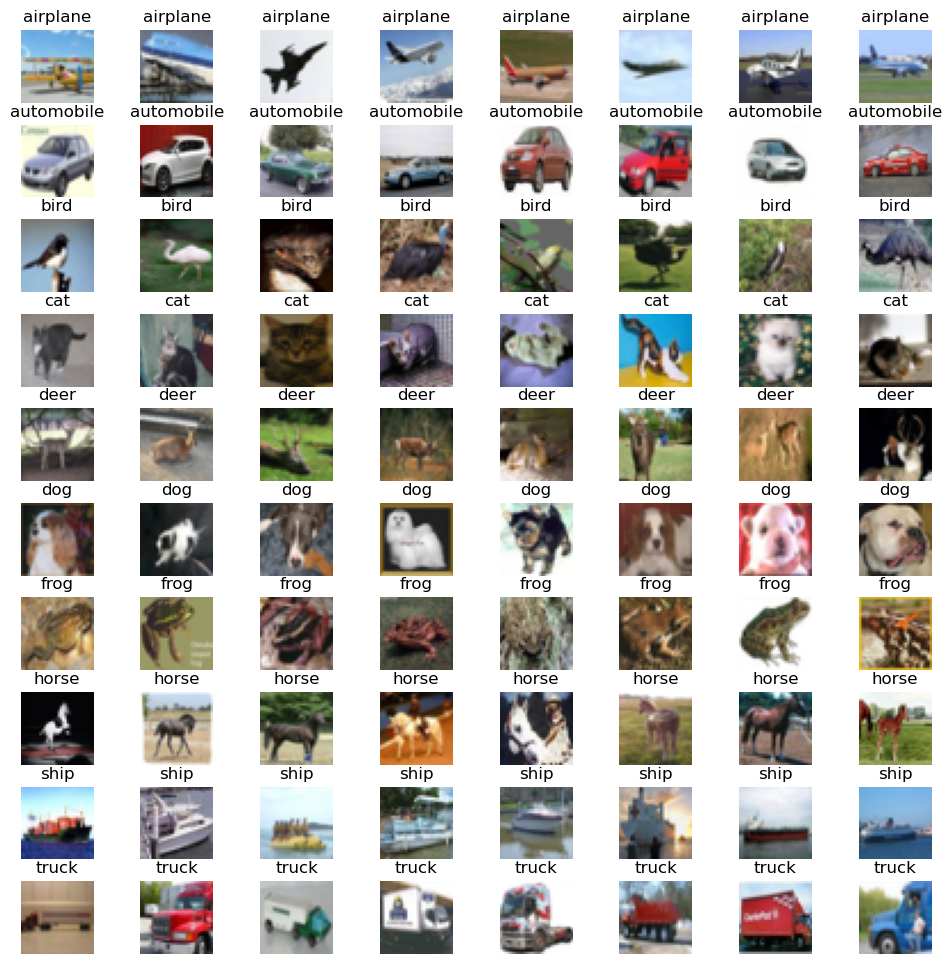

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of images to show per category
images_per_category = 8

# Create a list of class labels for reference
class_labels = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Initialize a plot with 10 rows and 8 columns for the subplots
fig, axes = plt.subplots(10, images_per_category, figsize=(12, 12))

# Iterate through each category
for i in range(10):
    # Get the indices of the images in the current category
    category_indices = np.where(y_train == i)[0]
    
    # Randomly shuffle the indices
    np.random.shuffle(category_indices)
    
    # Show the first 8 images from the shuffled indices
    for j in range(images_per_category):
        image = x_train[category_indices[j]]
        ax = axes[i, j]
        ax.imshow(image)
        ax.set_title(class_labels[i])
        ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Display the plot
plt.show()


<a id='first_model'></a>

# 2 - First naive model

In order to better understand the importance of CNNs, it is instructive to first see how well a naive dense network performs on the dataset.

**Q6) Create a sequential model with 4 `Dense` hidden layers of 2048, 1024, 512, and 256 nodes each, with ReLU activation, and a final output layer of 10 nodes. Compile the model with a `categorical_crossentropy` loss, using the SGD optimizer, and the `accuracy` metric. 
Note that you will need to use the `Flatten` layer first in order to convert the 3D (x, y, rgb) image data into 1D.**

In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the model
model = Sequential()

# Add a Flatten layer to convert the 3D image data into 1D
model.add(Flatten(input_shape=(32, 32, 3)))

# Add the dense hidden layers with ReLU activation
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

# Add the final output layer with 10 nodes (for 10 classes) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


**Q7) Compute by hand the total number of trainable parameters (weights and biases) in the model.**

To compute the total number of trainable parameters in the model, you'll need to consider the weights and biases for each layer. Here's how you can compute the total number of parameters:

1. **Flatten Layer**: The Flatten layer doesn't have any weights or biases since it's just reshaping the input data.

2. **Dense Hidden Layers**:
   - The first dense layer (2048 nodes) has weights for each input feature (flattened pixels) and one bias per node. So, the first layer has `(32*32*3) * 2048 + 2048` parameters.
   - The second dense layer (1024 nodes) has weights for each of the 2048 nodes in the previous layer and one bias per node. So, the second layer has `2048 * 1024 + 1024` parameters.
   - The third dense layer (512 nodes) has weights for each of the 1024 nodes in the previous layer and one bias per node. So, the third layer has `1024 * 512 + 512` parameters.
   - The fourth dense layer (256 nodes) has weights for each of the 512 nodes in the previous layer and one bias per node. So, the fourth layer has `512 * 256 + 256` parameters.

3. **Output Layer**: The output layer (10 nodes) has weights for each of the 256 nodes in the previous layer and one bias per node. So, the output layer has `256 * 10 + 10` parameters.

Now, you can calculate the total number of trainable parameters by summing up the parameters in all layers:

Total parameters = (32 * 32 * 3 * 2048 + 2048) + (2048 * 1024 + 1024) + (1024 * 512 + 512) + (512 * 256 + 256) + (256 * 10 + 10)

Calculate this expression to find the total number of trainable parameters in your model.

**Q8) Use the `summary()` function on model to get a text summary of the model.  Did you compute the number of parameters correctly?**

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 9050378 (34.52 MB)
Trainable params: 90503

**Q9) Train the model:**
  - Start with a small batch size of 32 and train for 10 epochs
  - Use early stopping on the validation accuracy with a patience of 2 (use 10% of your training set as the validation set)
  
**How does the model perform?**

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

# Train the model
history = model.fit(x_train, y_train_one_hot, validation_split=0.1, batch_size=32, epochs=10, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
1407/1407 [==============================] - 90s 64ms/step - loss: 1.8435 - accuracy: 0.3378 - val_loss: 1.7142 - val_accuracy: 0.3754
Epoch 2/10
1407/1407 [==============================] - 86s 61ms/step - loss: 1.6449 - accuracy: 0.4162 - val_loss: 1.6650 - val_accuracy: 0.3996
Epoch 3/10
1407/1407 [==============================] - 87s 62ms/step - loss: 1.5577 - accuracy: 0.4455 - val_loss: 1.7443 - val_accuracy: 0.3874
Epoch 4/10
1407/1407 [==============================] - 111s 79ms/step - loss: 1.4918 - accuracy: 0.4686 - val_loss: 1.7949 - val_accuracy: 0.3468
Epoch 4: early stopping
313/313 [==============================] - 10s 30ms/step - loss: 1.7699 - accuracy: 0.3582
Test Accuracy: 35.82%


**Q10) Try changing the batch size to see if there is any improvement.**

In [10]:
history = model.fit(x_train, y_train_one_hot, validation_split=0.1, batch_size=16, epochs=10, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
2813/2813 [==============================] - 130s 46ms/step - loss: 1.5066 - accuracy: 0.4623 - val_loss: 1.4943 - val_accuracy: 0.4630
Epoch 2/10
2813/2813 [==============================] - 149s 53ms/step - loss: 1.4374 - accuracy: 0.4874 - val_loss: 1.5219 - val_accuracy: 0.4596
Epoch 3/10
2813/2813 [==============================] - 161s 57ms/step - loss: 1.3852 - accuracy: 0.5066 - val_loss: 1.4227 - val_accuracy: 0.5010
Epoch 4/10
2813/2813 [==============================] - 142s 50ms/step - loss: 1.3355 - accuracy: 0.5253 - val_loss: 1.4209 - val_accuracy: 0.4930
Epoch 5/10
2813/2813 [==============================] - 136s 48ms/step - loss: 1.2941 - accuracy: 0.5386 - val_loss: 1.4346 - val_accuracy: 0.4972
Epoch 5: early stopping
313/313 [==============================] - 7s 22ms/step - loss: 1.4375 - accuracy: 0.4921
Test Accuracy: 49.21%


**Q11) Try adding batch normalization after each hidden layer.  Any better?**

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization

# Define the model
model = Sequential()

# Add a Flatten layer to convert the 3D image data into 1D
model.add(Flatten(input_shape=(32, 32, 3)))

# Add the dense hidden layers with ReLU activation and Batch Normalization
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())  # Add Batch Normalization

# Add the final output layer with 10 nodes (for 10 classes) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 2048)              6293504   
                                                                 
 batch_normalization_4 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_5 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 512)              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

# Train the model
history = model.fit(x_train, y_train_one_hot, validation_split=0.1, batch_size=16, epochs=7, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

No, adding batch normalization after each hidden layer haven't improved the Test Accuracy.

<a id='cnn'></a>

# 3 - Convolutional Neural Network
 

Convolutional neural networks allow us to do drastically better on this dataset (and many image classification problems in general). In this task, you will build a convolutional network and see how it performs during training.

**Q12) Create a new model with the following layers**
  - 3x3 2D convolution with zero padding (same), 32 filters
  - ReLU activation
  - 3,3 2D convolution, no padding, 32 filters
  - ReLU activation
  - Max pooling with size (2,2)
  - 3x3 2D convolution, no padding, 64 filters
  - ReLU activation
  - 3x3 2D convolution, no padding, 64 filters
  - ReLU activation
  - Max pooling with size (2,2)
  - Flatten
  - Dense layer with 512 nodes, ReLU activation
  - Softmax output layer with 10 nodes
  
**Compile the network with same optimizer and metrics as the dense network.**  

In [26]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
conv_model = Sequential()

# Add layers as specified
conv_model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
conv_model.add(Conv2D(32, (3, 3), activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Conv2D(64, (3, 3), activation='relu'))
conv_model.add(Conv2D(64, (3, 3), activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Flatten())
conv_model.add(Dense(512, activation='relu'))
conv_model.add(Dense(10, activation='softmax'))  # Adjust the number of units to match the number of classes

# Compile the model with the same optimizer and metrics as the dense network
conv_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


**Q13) Compute by hand the number of trainable parameters in this network.  Are there more or less than the more simple dense network?  Why?  Confirm with `summary()`.**

To compute the number of trainable parameters in a neural network, you can use the following formulas for each layer type:

1. **Convolutional Layer**: For a convolutional layer, the number of trainable parameters is calculated as follows:
   - Number of Parameters = `(kernel_height * kernel_width * input_channels + 1) * number_of_filters`

2. **Dense Layer**: For a dense layer, the number of trainable parameters is calculated as follows:
   - Number of Parameters = `(input_size + 1) * number_of_units`

Let's calculate the number of trainable parameters in the network you specified:

- First Convolutional Layer:
  - Kernel size: 3x3
  - Input channels: 3
  - Number of filters: 32
  - Number of Parameters = `(3 * 3 * 3 + 1) * 32 = 896`

- Second Convolutional Layer:
  - Kernel size: 3x3
  - Input channels: 32
  - Number of filters: 32
  - Number of Parameters = `(3 * 3 * 32 + 1) * 32 = 9248`

- Third Convolutional Layer (Pooling layer doesn't have trainable parameters).

- Fourth Convolutional Layer:
  - Kernel size: 3x3
  - Input channels: 32
  - Number of filters: 64
  - Number of Parameters = `(3 * 3 * 32 + 1) * 64 = 18496`

- Fifth Convolutional Layer:
  - Kernel size: 3x3
  - Input channels: 64
  - Number of filters: 64
  - Number of Parameters = `(3 * 3 * 64 + 1) * 64 = 36928`

- Flatten Layer doesn't have trainable parameters.

- First Dense Layer:
  - Input size: 4096 (flattened output from the previous layer)
  - Number of units: 512
  - Number of Parameters = `(4096 + 1) * 512 = 2097664`

- Second Dense Layer:
  - Input size: 512
  - Number of units: 10 (output classes)
  - Number of Parameters = `(512 + 1) * 10 = 5130`

Now, let's add up the trainable parameters for each layer:

Total Trainable Parameters = 896 + 9248 + 0 + 18496 + 36928 + 0 + 2097664 + 5130 = 2,178,362 parameters

In [28]:
conv_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

**Q14) Use the same training procedure as before for 10 epochs and batch size of 32. How does the validation accuracy change with each epoch?**

In [9]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# One-hot encode the target labels
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)


In [33]:
# Create a Sequential model
conv_model = Sequential()

# Add layers as specified
conv_model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
conv_model.add(Conv2D(32, (3, 3), activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Conv2D(64, (3, 3), activation='relu'))
conv_model.add(Conv2D(64, (3, 3), activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Flatten())
conv_model.add(Dense(512, activation='relu'))
conv_model.add(Dense(10, activation='softmax'))  # Adjust the number of units to match the number of classes

# Compile the model with the same optimizer and metrics as the dense network
conv_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using one-hot encoded labels
history = conv_model.fit(x_train, y_train_encoded, validation_split=0.1, batch_size=32, epochs=10, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = conv_model.evaluate(x_test, y_test_encoded)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/10
1407/1407 [==============================] - 207s 146ms/step - loss: 2.0210 - accuracy: 0.2592 - val_loss: 1.8147 - val_accuracy: 0.3364
Epoch 2/10
1407/1407 [==============================] - 178s 127ms/step - loss: 1.6268 - accuracy: 0.4181 - val_loss: 1.5842 - val_accuracy: 0.4150
Epoch 3/10
1407/1407 [==============================] - 200s 142ms/step - loss: 1.4410 - accuracy: 0.4842 - val_loss: 1.4342 - val_accuracy: 0.4870
Epoch 4/10
1407/1407 [==============================] - 191s 136ms/step - loss: 1.3306 - accuracy: 0.5253 - val_loss: 1.3035 - val_accuracy: 0.5306
Epoch 5/10
1407/1407 [==============================] - 218s 155ms/step - loss: 1.2303 - accuracy: 0.5639 - val_loss: 1.4156 - val_accuracy: 0.4920
Epoch 6/10
1407/1407 [==============================] - 187s 133ms/step - loss: 1.1390 - accuracy: 0.6001 - val_loss: 1.1390 - val_accuracy: 0.6048
Epoch 7/10
1407/1407 [==============================] - 215s 153ms/step - loss: 1.0517 - accuracy: 0.6340 - val_

The validation accuracy increased with each epoch

**Q15) Increase the batch size to 64 and retrain.  Better or worse?  Try 128 as well.  How does increasing the batch size improve the training?**

In [34]:
history_batch64 = conv_model.fit(x_train, y_train_encoded, validation_split=0.1, batch_size=64, epochs=10, callbacks=[early_stopping])


Epoch 1/10
704/704 [==============================] - 165s 234ms/step - loss: 0.7102 - accuracy: 0.7551 - val_loss: 1.0995 - val_accuracy: 0.6364
Epoch 2/10
704/704 [==============================] - 199s 282ms/step - loss: 0.6658 - accuracy: 0.7727 - val_loss: 1.0810 - val_accuracy: 0.6476
Epoch 3/10
704/704 [==============================] - 191s 272ms/step - loss: 0.6237 - accuracy: 0.7865 - val_loss: 1.4004 - val_accuracy: 0.5760
Epoch 4/10
704/704 [==============================] - 180s 256ms/step - loss: 0.5842 - accuracy: 0.7970 - val_loss: 1.1989 - val_accuracy: 0.6464
Epoch 4: early stopping


The phenomenon we're observing, where the validation accuracy starts to decrease while the training accuracy continues to increase, is commonly referred to as "overfitting." Overfitting occurs when a machine learning model performs well on the training data but fails to generalize to new, unseen data. It means that the model has learned to memorize the training data rather than capturing the underlying patterns and relationships within the data.

To address overfitting, we can apply regularization techniques like dropout, which helps to prevent overfitting by randomly deactivating a fraction of neurons during each training step. This encourages the network to learn more robust features and reduces its reliance on specific training examples.

In [35]:
# Evaluate the model on the test set
test_loss, test_accuracy = conv_model.evaluate(x_test, y_test_encoded)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 8s 27ms/step - loss: 1.2197 - accuracy: 0.6320
Test Accuracy: 63.20%


**Q16) Note how the validation accuracy begins to decrease at some point, while the training accuracy continues to increase.  What is this phenomena called?  Try adding 3 dropout layers to the model, one before each max pooling layer and one before the last layer, using a dropout ratio of 0.25.  Does this improve the model?**

In [10]:
# Create a Sequential model
conv_model = Sequential()

# Add layers with dropout
conv_model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
conv_model.add(Dropout(0.25))  # Dropout layer added
conv_model.add(Conv2D(32, (3, 3), activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Dropout(0.25))  # Dropout layer added
conv_model.add(Conv2D(64, (3, 3), activation='relu'))
conv_model.add(Dropout(0.25))  # Dropout layer added
conv_model.add(Conv2D(64, (3, 3), activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Dropout(0.25))  # Dropout layer added
conv_model.add(Flatten())
conv_model.add(Dense(512, activation='relu'))
conv_model.add(Dropout(0.25))  # Dropout layer added
conv_model.add(Dense(10, activation='softmax'))  # Adjust the number of units to match the number of classes

# Compile the model with the same optimizer and metrics as before
conv_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

# Train the model using one-hot encoded labels
history = conv_model.fit(x_train, y_train_encoded, validation_split=0.1, batch_size=64, epochs=10, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = conv_model.evaluate(x_test, y_test_encoded)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
704/704 [==============================] - 223s 315ms/step - loss: 2.1986 - accuracy: 0.1670 - val_loss: 2.0829 - val_accuracy: 0.2212
Epoch 2/10
704/704 [==============================] - 221s 314ms/step - loss: 1.9832 - accuracy: 0.2729 - val_loss: 2.1084 - val_accuracy: 0.2228
Epoch 3/10
704/704 [==============================] - 211s 300ms/step - loss: 1.8404 - accuracy: 0.3325 - val_loss: 1.9652 - val_accuracy: 0.2630
Epoch 4/10
704/704 [==============================] - 207s 294ms/step - loss: 1.7367 - accuracy: 0.3715 - val_loss: 1.6792 - val_accuracy: 0.4042
Epoch 5/10
704/704 [==============================] - 211s 299ms/step - loss: 1.6449 - accuracy: 0.4032 - val_loss: 1.5724 - val_accuracy: 0.4302
Epoch 6/10
704/704 [==============================] - 223s 317ms/step - loss: 1.5693 - accuracy: 0.4302 - val_loss: 1.6361 - val_accuracy: 0.4264
Epoch 7/10
704/704 [==============================] - 224s 318ms/step - loss: 1.5203 - accuracy: 0.4468 - val_loss: 1.6439 -

**Q17) Play with batch normalization.  For example, add batch normalization layers after each dropout layer.  Do you notice a faster increase in the model improvement? Why?**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Create a Sequential model
conv_model = Sequential()

# Add layers with dropout and batch normalization
conv_model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
conv_model.add(Dropout(0.25))
conv_model.add(BatchNormalization())  # Batch Normalization layer added
conv_model.add(Conv2D(32, (3, 3), activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Dropout(0.25))
conv_model.add(BatchNormalization())  # Batch Normalization layer added
conv_model.add(Conv2D(64, (3, 3), activation='relu'))
conv_model.add(Dropout(0.25))
conv_model.add(BatchNormalization())  # Batch Normalization layer added
conv_model.add(Conv2D(64, (3, 3), activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Dropout(0.25))
conv_model.add(BatchNormalization())  # Batch Normalization layer added
conv_model.add(Flatten())
conv_model.add(Dense(512, activation='relu'))
conv_model.add(Dropout(0.25))
conv_model.add(BatchNormalization())  # Batch Normalization layer added
conv_model.add(Dense(10, activation='softmax'))

# Compile the model with the same optimizer and metrics as before
conv_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

# Train the model using one-hot encoded labels
history = conv_model.fit(x_train, y_train_encoded, validation_split=0.1, batch_size=64, epochs=10, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = conv_model.evaluate(x_test, y_test_encoded)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/10
704/704 [==============================] - 258s 364ms/step - loss: 2.0633 - accuracy: 0.2982 - val_loss: 2.3943 - val_accuracy: 0.1844
Epoch 2/10
704/704 [==============================] - 252s 358ms/step - loss: 1.6519 - accuracy: 0.4019 - val_loss: 1.5306 - val_accuracy: 0.4398
Epoch 3/10
704/704 [==============================] - 255s 363ms/step - loss: 1.5209 - accuracy: 0.4493 - val_loss: 1.8704 - val_accuracy: 0.3412
Epoch 4/10
704/704 [==============================] - 249s 354ms/step - loss: 1.4413 - accuracy: 0.4771 - val_loss: 1.8150 - val_accuracy: 0.3644
Epoch 4: early stopping
313/313 [==============================] - 9s 29ms/step - loss: 1.8224 - accuracy: 0.3662
Test Accuracy: 36.62%


The addition of Batch Normalization layers can indeed lead to a faster increase in the model's improvement during training. There are a few reasons why this might occur:

1. **Reduced Internal Covariate Shift**: Batch Normalization normalizes the activations of the neurons in a given layer. This means that the mean and variance of the inputs to each layer are maintained close to 0 and 1, respectively. This reduces the internal covariate shift, which can help in training deep networks more effectively. With less internal shift, each layer can learn more independently and effectively, which can lead to faster convergence.

2. **Reduced Vanishing and Exploding Gradients**: Batch Normalization can help mitigate the vanishing and exploding gradient problems. By maintaining activations within a certain range, gradients are less likely to become too small (vanish) or too large (explode). This, in turn, allows for more stable and faster training.

3. **Regularization Effect**: Batch Normalization also acts as a form of regularization. It has a slight regularizing effect, which can prevent overfitting and improve generalization. By including Batch Normalization layers, you introduce a level of noise into the training process, similar to dropout, which can help the model generalize better.

4. **Improved Learning Rate**: With Batch Normalization, you can often use higher learning rates, which can speed up convergence. This is because Batch Normalization stabilizes training, allowing you to use larger learning rates without the risk of divergence.

However, it's important to note that the actual speed of convergence and the final model performance can vary depending on the specific dataset, network architecture, and hyperparameters. While Batch Normalization generally accelerates training, it may not always result in faster improvement or higher accuracy for all models and datasets. It's crucial to experiment with different architectures and hyperparameters to find the best setup for your specific problem.

<a id='results'></a>

# 4 - Interpreting the results
 
<a id='results_prediction'></a>

## 4.1 - Making predictions

Assuming all went well during the previous tasks, you can now predict the category of a new image!  Here are a few examples of my predictions:

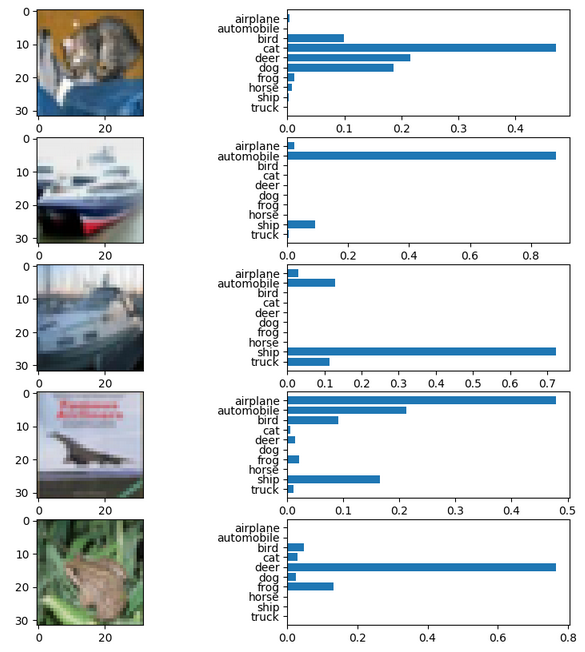

**Q18) Use `predict` on your trained model to test its prediction on a few example images of the test set. Using `imshow` and `hbar` from `matplotlib.pyplot`, try to recreate the image above for a few example images.**

<!---**Hint:** at this point, it is probably convenient to use the `save` and `load_model` functions from Keras.  You can save the model after training it, and then decide to load from saved file instead of building a new one (if available) on successive runs.--->

1/1 [==============================] - 0s 365ms/step


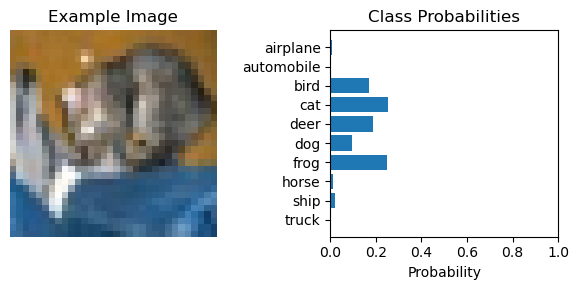

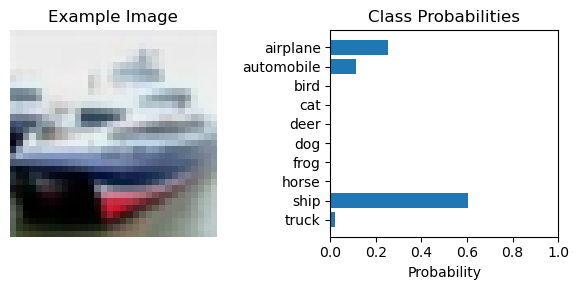

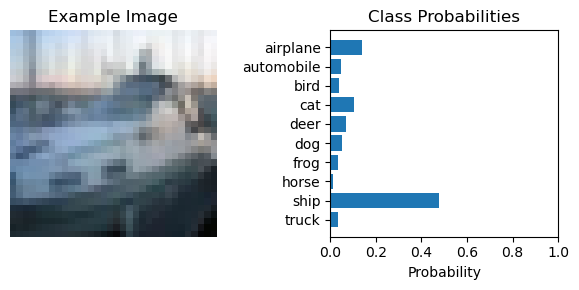

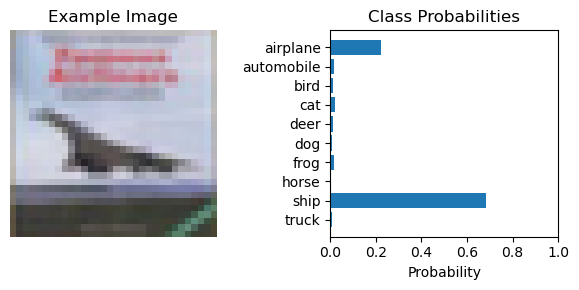

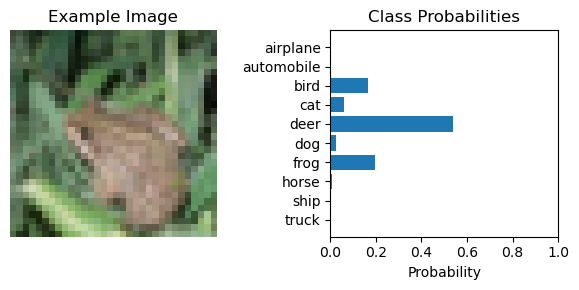

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Get some example images from the test set
example_images = x_test[:5]  # You can change the number of examples to visualize

# Make predictions using the trained model
predictions = conv_model.predict(example_images)

# Define class labels for CIFAR-10
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize the example images and predictions
for i in range(len(example_images)):
    plt.figure(figsize=(6, 3))
    
    # Display the example image
    plt.subplot(1, 2, 1)
    plt.imshow(example_images[i])
    plt.title("Example Image")
    plt.axis('off')
    
    # Display the prediction bar chart
    plt.subplot(1, 2, 2)
    plt.barh(class_labels, predictions[i])
    plt.xlabel("Probability")
    plt.title("Class Probabilities")
    plt.gca().invert_yaxis()  # Reverse the order of classes for better visualization
    plt.xlim(0, 1)  # Set the x-axis limit to the range [0, 1]
    
    plt.tight_layout()
    plt.show()


<a id='results_evaluation'></a>

## 4.2 Evaluating the results

A confusion matrix is often used in supervised learning to understand how well (or not) each category is being classified.  Each element (i,j) in the confusion matrix represents the predicted class j for each true class i.  Consider the following 10 predictions for a 2 category model predicting male or female:

| example     | true category  | predicted category  |
|-------------|----------------|---------------------|
| 1           | male           | male                |
| 2           | female         | male                |
| 3           | female         | female              |
| 4           | male           | male                |
| 5           | male           | female              |
| 6           | male           | male                |
| 7           | female         | female              |
| 8           | male           | female              |
| 9           | female         | female              |
| 10          | female         | female              |

Based on the above data, the model is accurate 70% of the time.  The confusion matrix is

|        | male | female |
|--------|------|--------|
| male   | 3    | 2      |
| female | 1    | 4      |

The confusion matrix gives us more information than a simple accuracy measurement.  In this case, we see that the class female has a higher accuracy over male.  

**Q19) Create the confusion matrix for the CIFAR-10 dataset using the test data.  What does it tell you about the relationships between each class?**

313/313 [==============================] - 11s 34ms/step


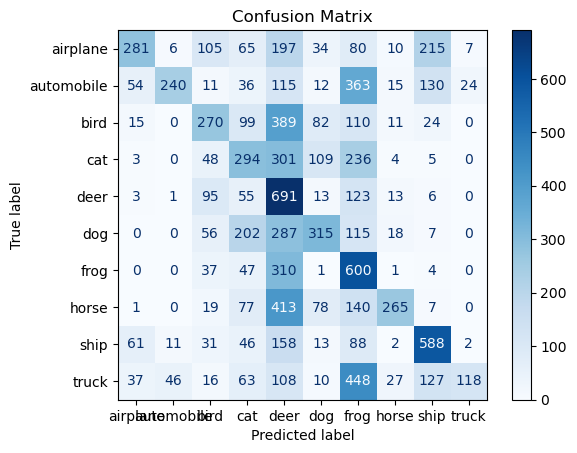

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Make predictions using the trained model on the entire test set
predictions = conv_model.predict(x_test)

# Convert one-hot encoded labels to class indices
y_true = np.argmax(y_test_encoded, axis=1)
y_pred = np.argmax(predictions, axis=1)

# Create the confusion matrix
confusion = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion, display_labels=class_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


<a id='pretrained_cnn'></a>
# 5 - Improving on current performances

**Q20) Play with different CNN architectures. Provide a few attempts**

In [16]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [17]:
class_labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

In [18]:
# Normalize the image data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [19]:
from tensorflow.keras.utils import to_categorical

# Convert the target arrays to one-hot encodings
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

In [20]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense


In [21]:
# Define and compile the simple CNN
simple_cnn = Sequential()
simple_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
simple_cnn.add(MaxPooling2D(pool_size=(2, 2)))
simple_cnn.add(Conv2D(64, (3, 3), activation='relu'))
simple_cnn.add(MaxPooling2D(pool_size=(2, 2)))
simple_cnn.add(Flatten())
simple_cnn.add(Dense(512, activation='relu'))
simple_cnn.add(Dense(10, activation='softmax'))
simple_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
# Define and compile the VGG16-like model
input_tensor = Input(shape=(32, 32, 3))
base_model = VGG16(weights=None, include_top=False, input_tensor=input_tensor)
x = Flatten()(base_model.output)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
vgg16_like = Model(inputs=input_tensor, outputs=output)
vgg16_like.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
# Define and compile the ResNet-18-like model
input_tensor = Input(shape=(32, 32, 3))
base_model = ResNet50(weights=None, include_top=False, input_tensor=input_tensor)
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
resnet_18 = Model(inputs=input_tensor, outputs=output)
resnet_18.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
# Train and evaluate each model
models = [simple_cnn, vgg16_like, resnet_18]
model_names = ["Simple CNN", "VGG16-like", "ResNet-18-like"]

for model, model_name in zip(models, model_names):
    print(f"Training {model_name}...")
    model.fit(x_train, y_train_encoded, validation_split=0.1, batch_size=64, epochs=10, verbose=2)
    
    print(f"Evaluating {model_name}...")
    test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
    print(f"{model_name} Test Accuracy: {test_accuracy * 100:.2f}%")
    
    y_pred = np.argmax(model.predict(x_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy (scikit-learn): {accuracy * 100:.2f}%")



Training Simple CNN...
Epoch 1/10
704/704 - 83s - loss: 1.4153 - accuracy: 0.4920 - val_loss: 1.1853 - val_accuracy: 0.5740 - 83s/epoch - 118ms/step
Epoch 2/10
704/704 - 106s - loss: 1.0518 - accuracy: 0.6300 - val_loss: 0.9910 - val_accuracy: 0.6588 - 106s/epoch - 150ms/step
Epoch 3/10
704/704 - 96s - loss: 0.8990 - accuracy: 0.6864 - val_loss: 0.9041 - val_accuracy: 0.6878 - 96s/epoch - 137ms/step
Epoch 4/10
704/704 - 109s - loss: 0.7726 - accuracy: 0.7304 - val_loss: 0.8889 - val_accuracy: 0.6972 - 109s/epoch - 155ms/step
Epoch 5/10
704/704 - 92s - loss: 0.6596 - accuracy: 0.7690 - val_loss: 0.8303 - val_accuracy: 0.7180 - 92s/epoch - 130ms/step
Epoch 6/10
704/704 - 88s - loss: 0.5483 - accuracy: 0.8082 - val_loss: 0.8446 - val_accuracy: 0.7352 - 88s/epoch - 125ms/step
Epoch 7/10
704/704 - 103s - loss: 0.4392 - accuracy: 0.8481 - val_loss: 0.8473 - val_accuracy: 0.7290 - 103s/epoch - 146ms/step
Epoch 8/10
704/704 - 95s - loss: 0.3348 - accuracy: 0.8860 - val_loss: 0.9234 - val_accur

KeyboardInterrupt: 

Note that several pre-trained networks are directly accessible via keras (see https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/5.3-using-a-pretrained-convnet.ipynb)